# Pre Process The Data - Real Life Stats

## Table of Contents

* [Load FIFA Data](#Load-FIFA-Data)
* [Adjust Names FIFA](#Adjust-Names-FIFA) - For merging FIFA data with real life stats
* [Load Real Life Stats Ratings](#Load-Real-Life-Stats-Ratings)
* [Adjust Names Stats](#Adjust-Names-Stats) - For merging FIFA data with real life stats
* [Merge Data](#Merge-Data) - Some of the merging has been done manually
* [Dropping Unnecessary Data](#Dropping-Unnecessary-Data)
* [Export](#Export)


In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_to_raw = "Dataset/Raw-Data"
output_folder = "Dataset/After-PreProcess"

## Load FIFA Data

In [3]:
fifa_ratings =  pd.read_csv(r"Dataset\After-PreProcess\predict-by-rating\Combined_Data.csv",low_memory = False)

In [4]:
fifa_ratings = fifa_ratings.drop("Unnamed: 0", axis=1)

In [7]:
import pandas as pd

def eliminate_numbers(df, column_name, new_col):
    df[new_col] = df[column_name].str.replace('\d+', '', regex=True)
    return df

def get_initials(df, column_name , new_col):
    df[new_col] = df[column_name].apply(lambda x: ' '.join([n[0] if i == 0 else n for i, n in enumerate(x.split())]))
    df[new_col] = df[column_name].str.replace(' ', '. ', regex=False)
    return df


def split_name_column(df, column_name , new_col):
    df = eliminate_numbers(df, column_name , new_col)
    df = get_initials(df, new_col , new_col)
    # Split full names into first initial and last name
    df['First Initial'] = df[new_col].str.extract(r'^(\w)\.?\s').fillna('')
    df['Last Name'] = df[new_col].str.extract(r'^(?:\w\.?\s)?(.+)$')
    df['Last Name'] = df['Last Name'].str.replace('. ', ' ', regex=False)
    return df


In [8]:
fifa_ratings

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Position,Wage,Value
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,67,66,67,62,53,62,22,Midfielder,195000,54000000
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,67,67,67,63,58,63,21,Forward,450000,64000000
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,67,69,67,64,63,64,22,Forward,420000,84000000
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,82,82,82,78,72,78,24,Midfielder,350000,107500000
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,70,66,70,66,57,66,21,Forward,230000,190500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,41,38,41,40,36,40,15,Midfielder,500,110000
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,47,48,47,49,49,49,15,Midfielder,500,90000
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,46,44,46,46,42,46,17,Midfielder,500,130000
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,44,42,44,47,49,47,15,Defender,500,100000


## Adjust Names FIFA

In [12]:
fifa_ratings_names = split_name_column(fifa_ratings.copy(), "Name" , "Name_Adjusted")

In [32]:
fifa_ratings_names

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,RB Rating,GK Rating,Position,Wage,Value,Name,Name_Adjusted,First Initial,Last Name,version
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,62,22,Midfielder,195000,54000000,L. Messi,L. Messi,L,Messi,2023
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,63,21,Forward,450000,64000000,K. Benzema,K. Benzema,K,Benzema,2023
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,64,22,Forward,420000,84000000,R. Lewandowski,R. Lewandowski,R,Lewandowski,2023
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,78,24,Midfielder,350000,107500000,K. De Bruyne,K. De. Bruyne,K,De Bruyne,2023
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,66,21,Forward,230000,190500000,K. Mbappé,K. Mbappé,K,Mbappé,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,40,15,Midfielder,500,110000,D. Collins,D. Collins,D,Collins,2023
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,49,15,Midfielder,500,90000,Yang Dejiang,Y. Dejiang,Y,Dejiang,2023
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,46,17,Midfielder,500,130000,L. Mullan,L. Mullan,L,Mullan,2023
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,47,15,Defender,500,100000,D. McCallion,D. McCallion,D,McCallion,2023


In [14]:
fifa_ratings_names.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

## Load Real Life Stats Ratings

In [15]:
big_5_path = r"Dataset\Raw-Data\players_stats\big_5"

In [16]:
stats_18 = pd.read_csv(big_5_path+ r"\big_5_17-18.csv",low_memory = False)
stats_19 = pd.read_csv(big_5_path+ r"\big_5_18-19.csv",low_memory = False)
stats_20 = pd.read_csv(big_5_path+ r"\big_5_19-20.csv",low_memory = False)
stats_21 = pd.read_csv(big_5_path+ r"\big_5_20-21.csv",low_memory = False)
stats_22 = pd.read_csv(big_5_path+ r"\big_5_21-22.csv",low_memory = False)
stats_23 = pd.read_csv(big_5_path+ r"\big_5_22--23.csv",low_memory = False)

In [17]:
stats_18["version"]= 2018
stats_19["version"]= 2019
stats_20["version"]= 2020
stats_21["version"]= 2021
stats_22["version"]= 2022
stats_23["version"]= 2023

In [18]:
combined_stats_df = df = pd.concat([stats_18 , stats_19 , stats_20 , stats_21 , stats_22, stats_23])

In [19]:
combined_stats_df

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches,-9999,version
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,26.0,1990.0,28,25,...,0.21,0.25,0.13,0.09,0.21,0.13,0.21,Matches,5f09991f,2018
1,2,Rolando Aarons,eng ENG,MFFW,Newcastle Utd,eng Premier League,21.0,1995.0,4,1,...,0.00,0.00,0.04,0.00,0.04,0.04,0.04,Matches,c5942695,2018
2,3,Rolando Aarons,eng ENG,MFFW,Hellas Verona,it Serie A,21.0,1995.0,11,6,...,0.00,0.00,0.03,0.03,0.06,0.03,0.06,Matches,c5942695,2018
3,4,Ignazio Abate,it ITA,DF,Milan,it Serie A,30.0,1986.0,17,11,...,0.09,0.09,0.01,0.04,0.06,0.01,0.06,Matches,1c529186,2018
4,5,Aymen Abdennour,tn TUN,DF,Marseille,fr Ligue 1,27.0,1989.0,8,6,...,0.00,0.00,0.02,0.00,0.02,0.02,0.02,Matches,2f798b41,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,2822,Szymon Żurkowski,pl POL,MF,Fiorentina,it Serie A,25-233,1997.0,2,0,...,0.00,2.81,0.33,0.06,0.40,0.33,0.40,Matches,4e1d5e59,2023
2822,2823,Szymon Żurkowski,pl POL,MF,Spezia,it Serie A,25-233,1997.0,7,2,...,0.00,0.00,0.04,0.00,0.04,0.04,0.04,Matches,4e1d5e59,2023
2823,2824,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,24-150,1998.0,35,35,...,0.46,0.67,0.30,0.23,0.53,0.30,0.53,Matches,79300479,2023
2824,2825,Milan Đurić,ba BIH,FW,Hellas Verona,it Serie A,32-359,1990.0,25,11,...,0.08,0.16,0.11,0.08,0.18,0.11,0.18,Matches,405f6586,2023


## Adjust Names Stats

In [20]:
combined_stats_df_names = split_name_column(combined_stats_df.copy(), "Player" , "Name_Adjusted")

In [21]:
combined_stats_df_names

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches,-9999,version,Name_Adjusted,First Initial,Last Name
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,26.0,1990.0,28,25,...,0.09,0.21,0.13,0.21,Matches,5f09991f,2018,P. van. Aanholt,P,van Aanholt
1,2,Rolando Aarons,eng ENG,MFFW,Newcastle Utd,eng Premier League,21.0,1995.0,4,1,...,0.00,0.04,0.04,0.04,Matches,c5942695,2018,R. Aarons,R,Aarons
2,3,Rolando Aarons,eng ENG,MFFW,Hellas Verona,it Serie A,21.0,1995.0,11,6,...,0.03,0.06,0.03,0.06,Matches,c5942695,2018,R. Aarons,R,Aarons
3,4,Ignazio Abate,it ITA,DF,Milan,it Serie A,30.0,1986.0,17,11,...,0.04,0.06,0.01,0.06,Matches,1c529186,2018,I. Abate,I,Abate
4,5,Aymen Abdennour,tn TUN,DF,Marseille,fr Ligue 1,27.0,1989.0,8,6,...,0.00,0.02,0.02,0.02,Matches,2f798b41,2018,A. Abdennour,A,Abdennour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,2822,Szymon Żurkowski,pl POL,MF,Fiorentina,it Serie A,25-233,1997.0,2,0,...,0.06,0.40,0.33,0.40,Matches,4e1d5e59,2023,S. Żurkowski,S,Żurkowski
2822,2823,Szymon Żurkowski,pl POL,MF,Spezia,it Serie A,25-233,1997.0,7,2,...,0.00,0.04,0.04,0.04,Matches,4e1d5e59,2023,S. Żurkowski,S,Żurkowski
2823,2824,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,24-150,1998.0,35,35,...,0.23,0.53,0.30,0.53,Matches,79300479,2023,M. Ødegaard,M,Ødegaard
2824,2825,Milan Đurić,ba BIH,FW,Hellas Verona,it Serie A,32-359,1990.0,25,11,...,0.08,0.18,0.11,0.18,Matches,405f6586,2023,M. Đurić,M,Đurić


In [30]:
merged_df = pd.merge(fifa_ratings_names, combined_stats_df_names, how='inner', left_on=['Age', 'Last Name', 'Club Name' , 'version'], 
                     right_on=['Age', 'Last Name', 'Squad' , 'version'])

In [31]:
merged_df

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches,-9999,Name_Adjusted_y,First Initial_y


<AxesSubplot:xlabel='Overall', ylabel='Gls'>

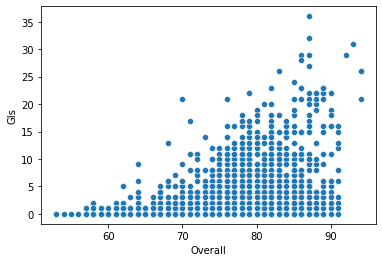

In [27]:
import seaborn as sns

sns.scatterplot(merged_df , x='Overall', y='Gls').set_title('Overa')

<AxesSubplot:xlabel='Next_Overall', ylabel='Gls'>

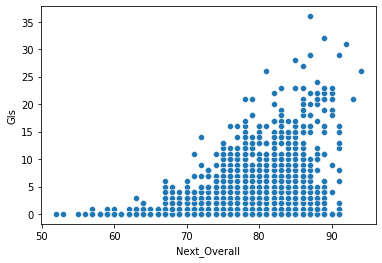

In [30]:
sns.scatterplot(merged_df , x='Next_Overall', y='Gls')

In [61]:
map_position= {
    'GK': 'Goalkeeper',
    'CB': 'Defender',
    'RB': 'Defender',
    'LB': 'Defender',
    'RWB': 'Defender',
    'LWB': 'Defender',
    'CM': 'Midfielder',
    'CDM': 'Midfielder',
    'CAM': 'Midfielder',
    'RM': 'Midfielder',
    'LM': 'Midfielder',
    'ST': 'Forward',
    'CF': 'Forward',
    'RF': 'Forward',
    'LF': 'Forward',
    'RW': 'Forward',
    'LW': 'Forward'
}

In [62]:
merged_df['Position'] = merged_df['Best Position'].map(map_position)
prem_position_groups = merged_df.groupby('Position')

positions = {}
for position, group in prem_position_groups:
    positions[str(position)] = pd.DataFrame(group)

    
stats_defenders_df = positions['Defender']
stats_forward_df = positions['Forward']
stats_gk_df = positions['Goalkeeper']
stats_midfielders_df = positions['Midfielder']

Export Data

In [34]:
stats_defenders_df.to_csv(output_folder+'/predict-with-real-life-stats/stats_defenders_df.csv',mode='w',header=True, index=False)
stats_forward_df.to_csv(output_folder+'/predict-with-real-life-stats/stats_forward_df.csv',mode='w',header=True, index=False)
stats_gk_df.to_csv(output_folder+'/predict-with-real-life-stats/stats_gk_df.csv',mode='w',header=True, index=False)
stats_midfielders_df.to_csv(output_folder+'/predict-with-real-life-stats/stats_midfielders_df.csv',mode='w',header=True, index=False)

In [35]:
merged_df.to_csv(output_folder+'/predict-with-real-life-stats/stats_Full_df.csv',mode='w',header=True, index=False)

## Combine Fifa 23 to goals

In [3]:
fifa_ratings =  pd.read_csv(r"Dataset\After-PreProcess\predict-by-rating\f23-full.csv",low_memory = False)

In [11]:
fifa_ratings["Name"] =fifa_ratings["Known As"]

In [24]:
fifa_ratings.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [28]:
combined_stats_df_names

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches,-9999,version,Name_Adjusted,First Initial,Last Name
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,26.0,1990.0,28,25,...,0.09,0.21,0.13,0.21,Matches,5f09991f,2018,P. van. Aanholt,P,van Aanholt
1,2,Rolando Aarons,eng ENG,MFFW,Newcastle Utd,eng Premier League,21.0,1995.0,4,1,...,0.00,0.04,0.04,0.04,Matches,c5942695,2018,R. Aarons,R,Aarons
2,3,Rolando Aarons,eng ENG,MFFW,Hellas Verona,it Serie A,21.0,1995.0,11,6,...,0.03,0.06,0.03,0.06,Matches,c5942695,2018,R. Aarons,R,Aarons
3,4,Ignazio Abate,it ITA,DF,Milan,it Serie A,30.0,1986.0,17,11,...,0.04,0.06,0.01,0.06,Matches,1c529186,2018,I. Abate,I,Abate
4,5,Aymen Abdennour,tn TUN,DF,Marseille,fr Ligue 1,27.0,1989.0,8,6,...,0.00,0.02,0.02,0.02,Matches,2f798b41,2018,A. Abdennour,A,Abdennour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,2822,Szymon Żurkowski,pl POL,MF,Fiorentina,it Serie A,25-233,1997.0,2,0,...,0.06,0.40,0.33,0.40,Matches,4e1d5e59,2023,S. Żurkowski,S,Żurkowski
2822,2823,Szymon Żurkowski,pl POL,MF,Spezia,it Serie A,25-233,1997.0,7,2,...,0.00,0.04,0.04,0.04,Matches,4e1d5e59,2023,S. Żurkowski,S,Żurkowski
2823,2824,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,24-150,1998.0,35,35,...,0.23,0.53,0.30,0.53,Matches,79300479,2023,M. Ødegaard,M,Ødegaard
2824,2825,Milan Đurić,ba BIH,FW,Hellas Verona,it Serie A,32-359,1990.0,25,11,...,0.08,0.18,0.11,0.18,Matches,405f6586,2023,M. Đurić,M,Đurić


In [29]:
fifa_ratings_names["version"] = 2023

In [33]:
fifa_ratings_names

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,RB Rating,GK Rating,Position,Wage,Value,Name,Name_Adjusted,First Initial,Last Name,version
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,62,22,Midfielder,195000,54000000,L. Messi,L. Messi,L,Messi,2023
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,63,21,Forward,450000,64000000,K. Benzema,K. Benzema,K,Benzema,2023
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,64,22,Forward,420000,84000000,R. Lewandowski,R. Lewandowski,R,Lewandowski,2023
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,78,24,Midfielder,350000,107500000,K. De Bruyne,K. De. Bruyne,K,De Bruyne,2023
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,66,21,Forward,230000,190500000,K. Mbappé,K. Mbappé,K,Mbappé,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,40,15,Midfielder,500,110000,D. Collins,D. Collins,D,Collins,2023
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,49,15,Midfielder,500,90000,Yang Dejiang,Y. Dejiang,Y,Dejiang,2023
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,46,17,Midfielder,500,130000,L. Mullan,L. Mullan,L,Mullan,2023
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,47,15,Defender,500,100000,D. McCallion,D. McCallion,D,McCallion,2023


In [34]:
combined_stats_df_names

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches,-9999,version,Name_Adjusted,First Initial,Last Name
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,26.0,1990.0,28,25,...,0.09,0.21,0.13,0.21,Matches,5f09991f,2018,P. van. Aanholt,P,van Aanholt
1,2,Rolando Aarons,eng ENG,MFFW,Newcastle Utd,eng Premier League,21.0,1995.0,4,1,...,0.00,0.04,0.04,0.04,Matches,c5942695,2018,R. Aarons,R,Aarons
2,3,Rolando Aarons,eng ENG,MFFW,Hellas Verona,it Serie A,21.0,1995.0,11,6,...,0.03,0.06,0.03,0.06,Matches,c5942695,2018,R. Aarons,R,Aarons
3,4,Ignazio Abate,it ITA,DF,Milan,it Serie A,30.0,1986.0,17,11,...,0.04,0.06,0.01,0.06,Matches,1c529186,2018,I. Abate,I,Abate
4,5,Aymen Abdennour,tn TUN,DF,Marseille,fr Ligue 1,27.0,1989.0,8,6,...,0.00,0.02,0.02,0.02,Matches,2f798b41,2018,A. Abdennour,A,Abdennour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,2822,Szymon Żurkowski,pl POL,MF,Fiorentina,it Serie A,25-233,1997.0,2,0,...,0.06,0.40,0.33,0.40,Matches,4e1d5e59,2023,S. Żurkowski,S,Żurkowski
2822,2823,Szymon Żurkowski,pl POL,MF,Spezia,it Serie A,25-233,1997.0,7,2,...,0.00,0.04,0.04,0.04,Matches,4e1d5e59,2023,S. Żurkowski,S,Żurkowski
2823,2824,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,24-150,1998.0,35,35,...,0.23,0.53,0.30,0.53,Matches,79300479,2023,M. Ødegaard,M,Ødegaard
2824,2825,Milan Đurić,ba BIH,FW,Hellas Verona,it Serie A,32-359,1990.0,25,11,...,0.08,0.18,0.11,0.18,Matches,405f6586,2023,M. Đurić,M,Đurić


## Merge Data

In [53]:
merged_df = pd.merge(fifa_ratings_names, df22, how='inner', left_on=['version', 'Last Name','Club Name'], 
                     right_on=['version', 'Last Name', 'Squad'])

In [44]:
df22 =combined_stats_df_names.copy()

In [49]:
df22 = df22.query("version == 2023")

In [51]:
df22

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches,-9999,version,Name_Adjusted,First Initial,Last Name
0,1,Brenden Aaronson,us USA,MFFW,Leeds United,eng Premier League,22-206,2000.0,34,28,...,0.17,0.31,0.14,0.31,Matches,5bc43860,2023,B. Aaronson,B,Aaronson
1,2,Paxten Aaronson,us USA,MFDF,Eint Frankfurt,de Bundesliga,19-263,2003.0,6,0,...,0.03,0.14,0.11,0.14,Matches,4cd41883,2023,P. Aaronson,P,Aaronson
2,3,James Abankwah,ie IRL,DF,Udinese,it Serie A,19-120,2004.0,1,0,...,0.00,0.00,0.00,0.00,Matches,4b7a9fcc,2023,J. Abankwah,J,Abankwah
3,4,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,35-230,1987.0,35,35,...,0.03,0.09,0.07,0.09,Matches,32c2d95f,2023,Y. Abdelhamid,Y,Abdelhamid
4,5,Himad Abdelli,fr FRA,MFFW,Angers,fr Ligue 1,23-180,1999.0,27,21,...,0.12,0.18,0.06,0.18,Matches,7978cbf0,2023,H. Abdelli,H,Abdelli
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,2822,Szymon Żurkowski,pl POL,MF,Fiorentina,it Serie A,25-233,1997.0,2,0,...,0.06,0.40,0.33,0.40,Matches,4e1d5e59,2023,S. Żurkowski,S,Żurkowski
2822,2823,Szymon Żurkowski,pl POL,MF,Spezia,it Serie A,25-233,1997.0,7,2,...,0.00,0.04,0.04,0.04,Matches,4e1d5e59,2023,S. Żurkowski,S,Żurkowski
2823,2824,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,24-150,1998.0,35,35,...,0.23,0.53,0.30,0.53,Matches,79300479,2023,M. Ødegaard,M,Ødegaard
2824,2825,Milan Đurić,ba BIH,FW,Hellas Verona,it Serie A,32-359,1990.0,25,11,...,0.08,0.18,0.11,0.18,Matches,405f6586,2023,M. Đurić,M,Đurić


In [55]:
merged_df["Age"] = merged_df["Age_x"]

In [54]:
merged_df

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age_x,...,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches,-9999,Name_Adjusted_y,First Initial_y
0,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,0.88,0.21,0.52,0.74,0.21,0.74,Matches,e46012d4,K. De. Bruyne,K
1,M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,https://cdn.sofifa.net/players/209/331/23_60.png,30,...,0.78,0.59,0.21,0.80,0.50,0.70,Matches,e342ad68,M. Salah,M
2,V. van Dijk,Virgil van Dijk,90,90,98000000,CB,CB,Netherlands,https://cdn.sofifa.net/players/203/376/23_60.png,30,...,0.13,0.08,0.04,0.12,0.08,0.12,Matches,e06683ca,V. van. Dijk,V
3,Ederson,Ederson Santana de Moraes,89,91,88000000,GK,GK,Brazil,https://cdn.sofifa.net/players/210/257/23_60.png,28,...,0.03,0.00,0.01,0.01,0.00,0.01,Matches,3bb7b8b4,E,
4,Alisson,Alisson Ramses Becker,89,90,79000000,GK,GK,Brazil,https://cdn.sofifa.net/players/212/831/23_60.png,29,...,0.03,0.00,0.01,0.01,0.00,0.01,Matches,7a2e46a8,A,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,A. Bianco,Alessandro Bianco,58,69,450000,CM,CDM,Italy,https://cdn.sofifa.net/players/271/477/23_60.png,19,...,0.00,0.05,0.01,0.06,0.05,0.06,Matches,d65cf468,A. Bianco,A
628,D. Gyabi,Darko Gyabi,57,80,525000,CM,CAM,England,https://cdn.sofifa.net/players/270/209/23_60.png,18,...,0.00,0.72,0.00,0.72,0.72,0.72,Matches,56d838f7,D. Gyabi,D
629,L. Brunt,Lewis Brunt,55,70,300000,"CB,LB",CDM,England,https://cdn.sofifa.net/players/246/392/23_60.png,21,...,0.00,0.00,0.00,0.00,0.00,0.00,Matches,a2081c6b,L. Brunt,L
630,J. Whitworth,Joe Whitworth,53,76,275000,GK,GK,England,https://cdn.sofifa.net/players/271/191/23_60.png,18,...,0.00,0.00,0.00,0.00,0.00,0.00,Matches,3f847d95,J. Whitworth,J


# Dropping Unnecessary Data

In [57]:
merged_df = merged_df.drop(['Name_Adjusted_y', 'First Initial_y' , 'Age_x'], axis=1)

In [59]:
merged_df = merged_df.drop(['Height(in cm)', '-9999', 'Positions Played','Value(in Euro)',], axis=1)

# Export

In [63]:
stats_defenders_df.to_csv(output_folder+'/predict-with-real-life-stats/f23-stats_defenders_df.csv',mode='w',header=True, index=False)
stats_forward_df.to_csv(output_folder+'/predict-with-real-life-stats/f23-stats_forward_df.csv',mode='w',header=True, index=False)
stats_gk_df.to_csv(output_folder+'/predict-with-real-life-stats/f23-stats_gk_df.csv',mode='w',header=True, index=False)
stats_midfielders_df.to_csv(output_folder+'/predict-with-real-life-stats/f23-stats_midfielders_df.csv',mode='w',header=True, index=False)
merged_df.to_csv(output_folder+'/predict-with-real-life-stats/f23-stats_Full_df.csv',mode='w',header=True, index=False)